In [1]:
import sys
from matplotlib import pyplot as plt
import numpy as np
import heat_transfer_coefficient as htc
import global_number as gn

# 対流熱伝達率の検証

In [2]:
# 風速をパラメータにする
v_a = [x / 200.0 for x in range(100)]

In [3]:
# 温度条件は固定
theta_1 = 20.0
theta_2 = 16.0

In [4]:
# 角度はパラメータ
angle = [x * 1.0 for x in range(91)]

In [5]:
# 通気層高さ、厚さは固定
l_h = 3.0
l_d = 0.03

In [6]:
# 角度の影響を見る
h_cv01 = [htc.convective_heat_transfer_coefficient(v_a=0.1,
                                                theta_1=theta_1,
                                                theta_2=theta_2,
                                                angle=a,
                                                l_h=l_h,
                                                l_d=l_d,
                                                c_a=gn.get_c_air(),
                                                rho_a=gn.get_rho_air()) for a in angle]
h_cv05 = [htc.convective_heat_transfer_coefficient(v_a=0.5,
                                                theta_1=theta_1,
                                                theta_2=theta_2,
                                                angle=a,
                                                l_h=l_h,
                                                l_d=l_d,
                                                c_a=gn.get_c_air(),
                                                rho_a=gn.get_rho_air()) for a in angle]
h_cv10 = [htc.convective_heat_transfer_coefficient(v_a=1.0,
                                                theta_1=theta_1,
                                                theta_2=theta_2,
                                                angle=a,
                                                l_h=l_h,
                                                l_d=l_d,
                                                c_a=gn.get_c_air(),
                                                rho_a=gn.get_rho_air()) for a in angle]

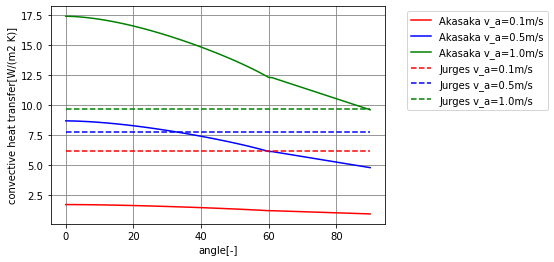

In [7]:
# グラフの描画
fig1 = plt.figure()
ax1 = fig1.subplots()

ax1.set_xlabel('angle[-]')
ax1.set_ylabel('convective heat transfer[W/(m2 K)]')

plt.grid(which='major',color='gray',linestyle='-')
plt.grid(which='minor',color='gray',linestyle='-')

plt.plot(angle,h_cv01,linestyle='solid',color='r',
         label='Akasaka v_a=0.1m/s')
plt.plot(angle,h_cv05,linestyle='solid',color='b',
         label='Akasaka v_a=0.5m/s')
plt.plot(angle,h_cv10,linestyle='solid',color='g',
         label='Akasaka v_a=1.0m/s')
plt.plot(angle,np.full(91, 5.8+3.9*0.1),linestyle='dashed',color='r',
         label='Jurges v_a=0.1m/s')
plt.plot(angle,np.full(91, 5.8+3.9*0.5),linestyle='dashed',color='b',
         label='Jurges v_a=0.5m/s')
plt.plot(angle,np.full(91, 5.8+3.9*1.0),linestyle='dashed',color='g',
         label='Jurges v_a=1.0m/s')

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()